# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import TRAIN.architecture.BERT.bert as bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

In [4]:
TRAIN_classes = 'all-classes'

data_config = {
  "data_unit" : sup.DATA_S_PV,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 16,
  "PH2" : True,
  "PH3" : False,
  "reducer" : '',
  "kernel" : '',
  "n" : 75,
}

train_config = {
  "arch" : sup.TRAIN_BERT_CODE,
  "device" : bert.device,
  "loadable" : bert.BERT_MINI,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "weight_decay" : 0,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 2000
}


In [5]:
sup.bert_score_tracker = []

model = bert.BERT(data_config=data_config, df=None, train_config=train_config)

In [6]:
model.df

,class_numeric,f0_h_v1x,f0_h_v1y,f0_h_v1z,f0_h_v2x,f0_h_v2y,f0_h_v2z,f0_h_v3x,f0_h_v3y,f0_h_v3z,...,f11_wh18z,f11_wh19x,f11_wh19y,f11_wh19z,f11_wh20x,f11_wh20y,f11_wh20z,f11_cp_h_mean_x,f11_cp_h_mean_y,f11_cp_h_mean_z
0,28,-0.951009,-0.274887,-0.001478,0.127148,-0.530356,0.703171,-0.213781,-0.711935,1.001942,...,-1.268045,0.894222,-0.102190,-1.276307,0.861770,-0.070783,-1.281769,-1.167972,0.038990,-0.803620
1,36,0.320837,-0.352668,0.387809,-0.376790,-0.518251,0.517883,0.278289,-0.125759,-0.655780,...,-1.386466,0.293177,0.730440,-1.461858,0.229640,0.704243,-1.442524,-0.426328,1.245385,-2.763109
2,29,-0.748425,-0.306723,-0.080616,0.260777,-0.503787,0.418407,0.019463,-0.824458,0.966399,...,-1.550982,0.742714,0.341162,-1.585854,0.701450,0.356758,-1.570713,-1.032909,0.679415,-2.038376
3,30,-0.371990,-0.357051,0.170788,0.497411,-0.476576,0.553372,0.093783,-0.671866,0.909241,...,-1.619154,0.867519,0.217375,-1.627450,0.804281,0.237664,-1.621564,-1.208228,0.769651,-1.692909
4,31,-0.301859,-0.357578,0.080005,0.607412,-0.428571,0.175897,0.415199,-0.758818,0.967600,...,-1.700858,0.566085,0.459268,-1.752322,0.494593,0.449874,-1.740109,-1.386027,0.647523,-1.466057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,23,-0.494675,-0.355299,0.450332,0.310572,-0.514096,0.742748,-0.316291,-0.158804,-0.798248,...,1.023826,1.023748,-0.414404,1.023962,1.001136,-0.404123,1.032103,1.411898,0.655565,-1.269543
3897,24,-0.811989,-0.318500,0.702685,0.049050,-0.545354,1.119633,-0.126065,-0.289658,-0.790091,...,1.242320,0.782239,-0.648881,1.237902,0.736633,-0.618172,1.230091,1.370845,0.751699,-1.385271
3898,25,0.675647,-0.242534,-0.764577,1.836571,0.434711,-1.075466,-1.660161,0.291618,-1.682821,...,-0.503062,1.930322,0.992768,-0.482613,1.966209,0.970719,-0.493314,1.000029,0.540896,-1.124253
3899,26,-0.239845,-0.369663,0.389420,0.001163,-0.511405,0.258397,-0.756695,-0.252875,-0.235269,...,-1.107771,-0.408672,1.003720,-1.116067,-0.423738,1.020917,-1.126080,0.797288,0.701791,-0.897438


In [7]:
model.fit(verbose=True)

In [8]:
model.test()
model.full_score()

0.6248399487836107
0.7580025608194623
0.6234893124301191
0.6337885354181
0.6259634549108233


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:205: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.loss_fig.show()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:247: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.confusion_fig.show()


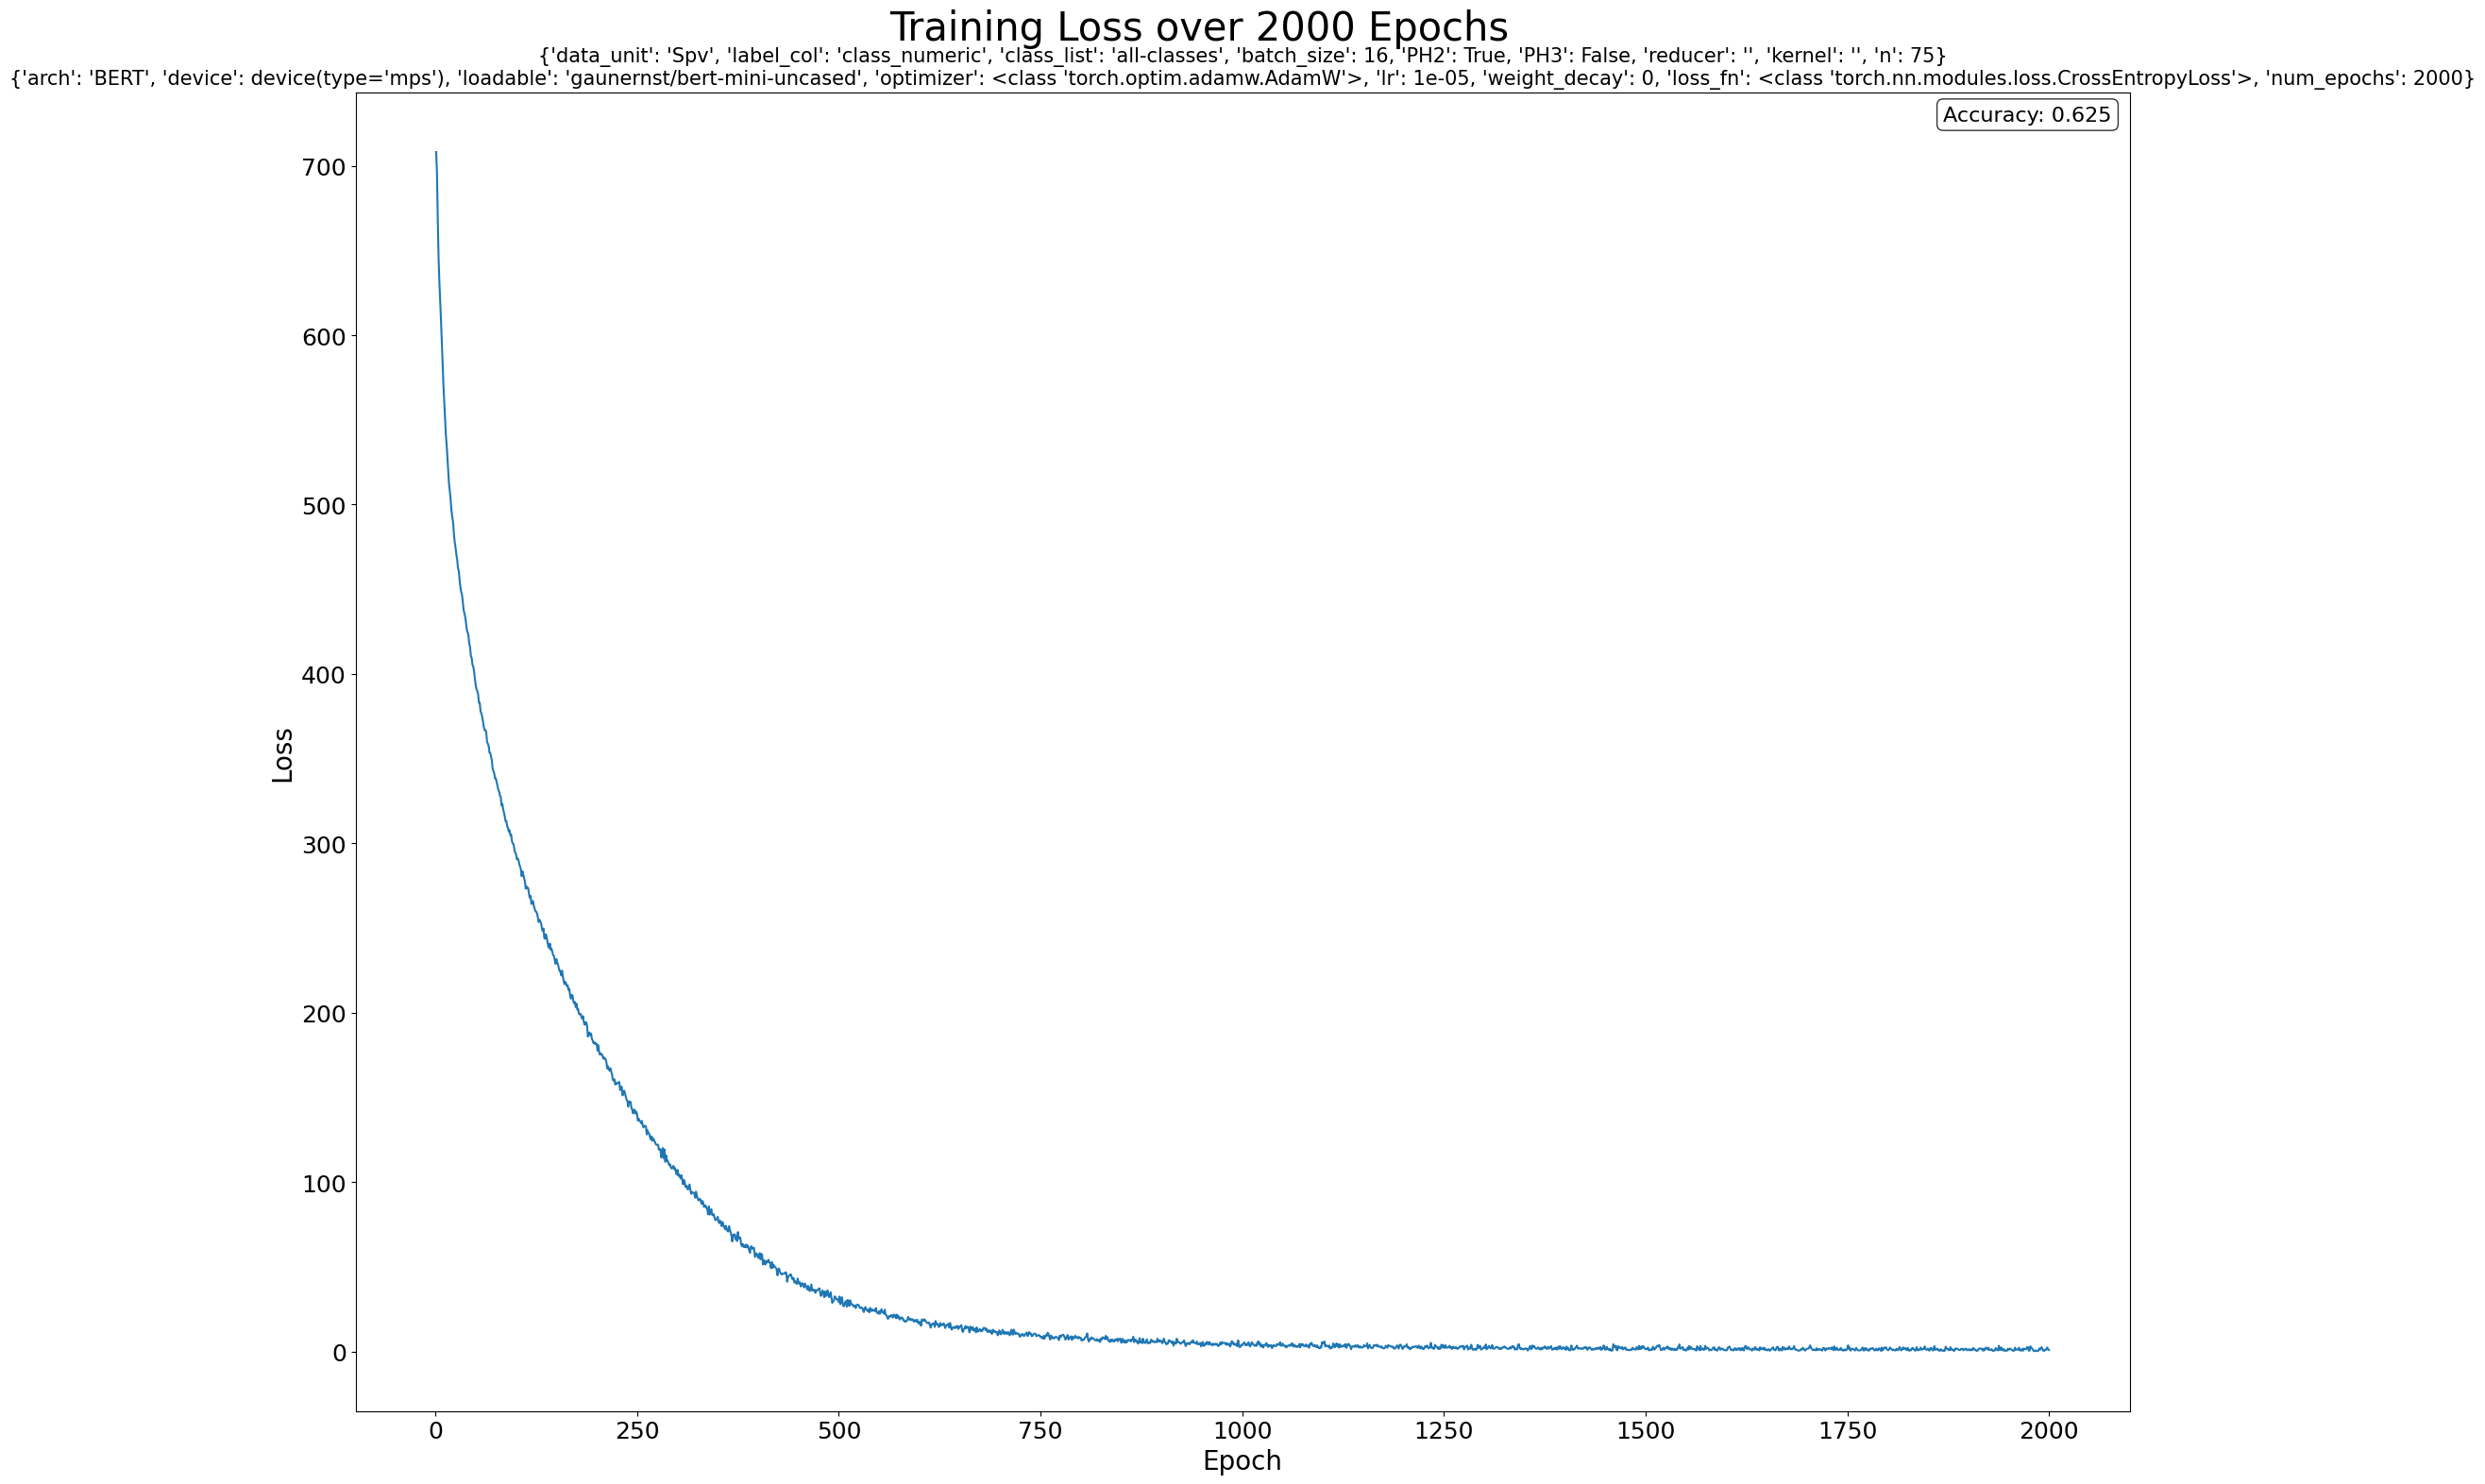

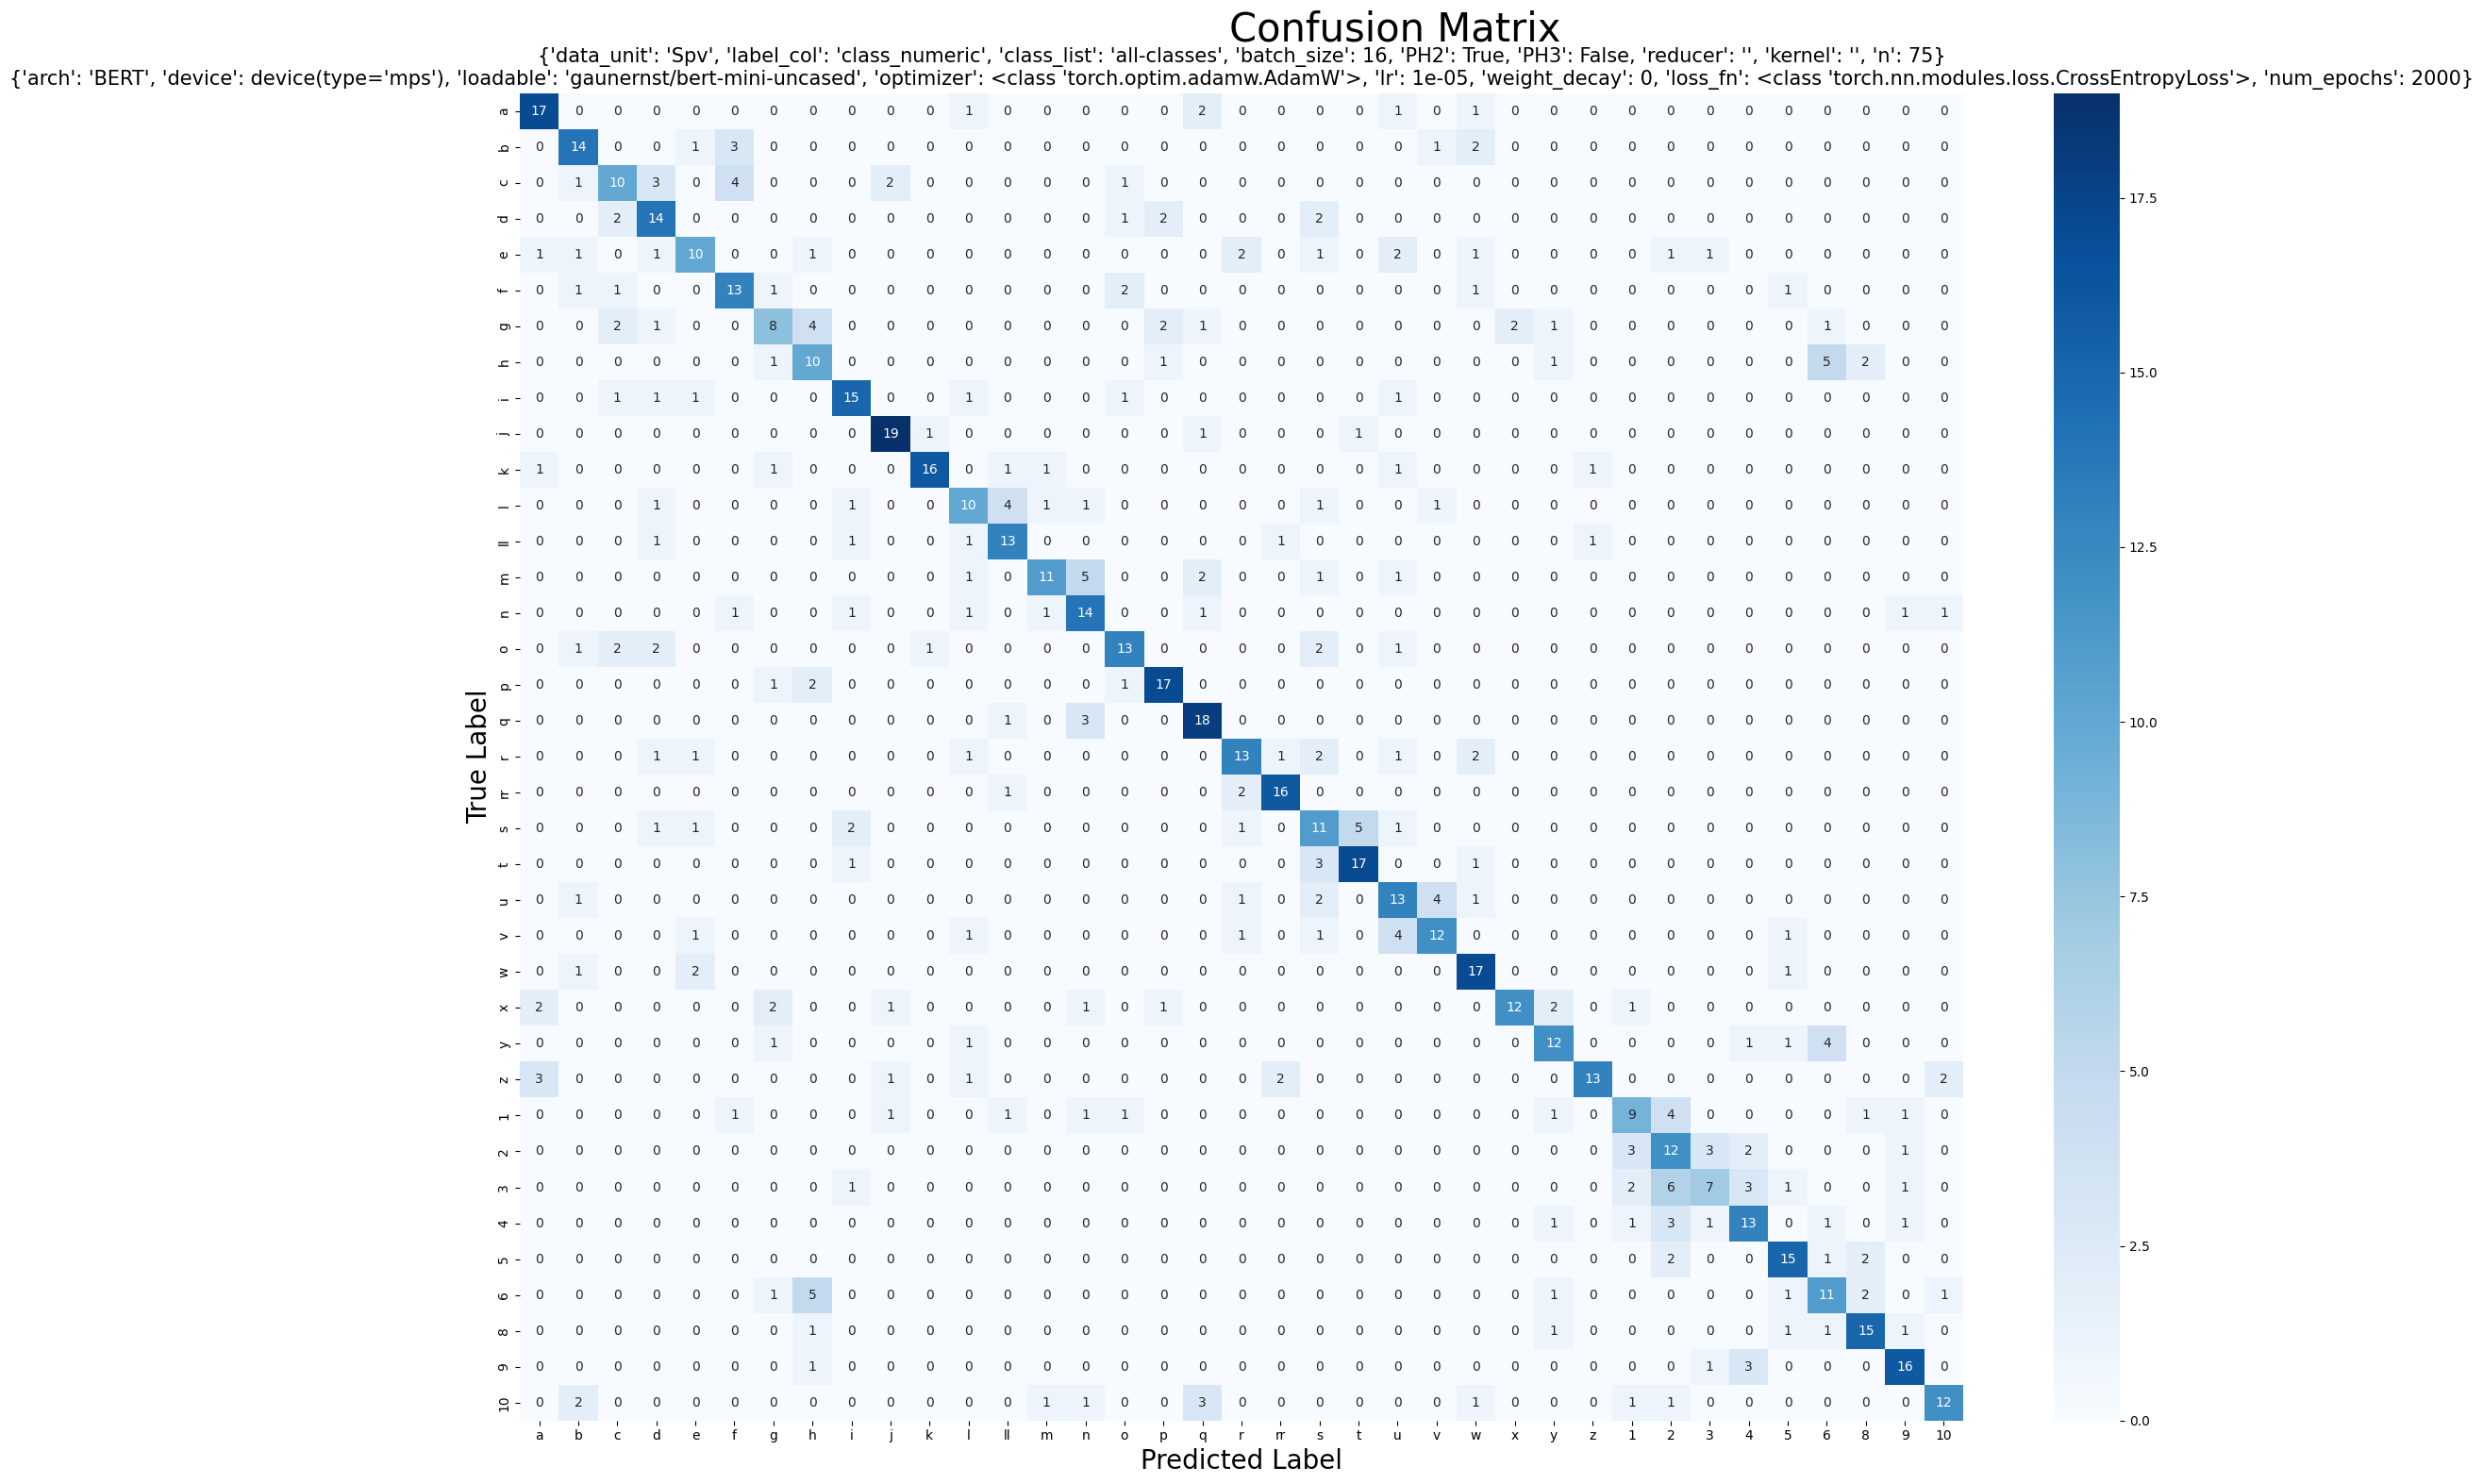

In [9]:
print(model.accuracy)
print(model.top2accuracy)
print(model.macro_f1)
print(model.macro_precision)
print(model.macro_recall)

model.show_loss()
model.show_confusion_matrix()

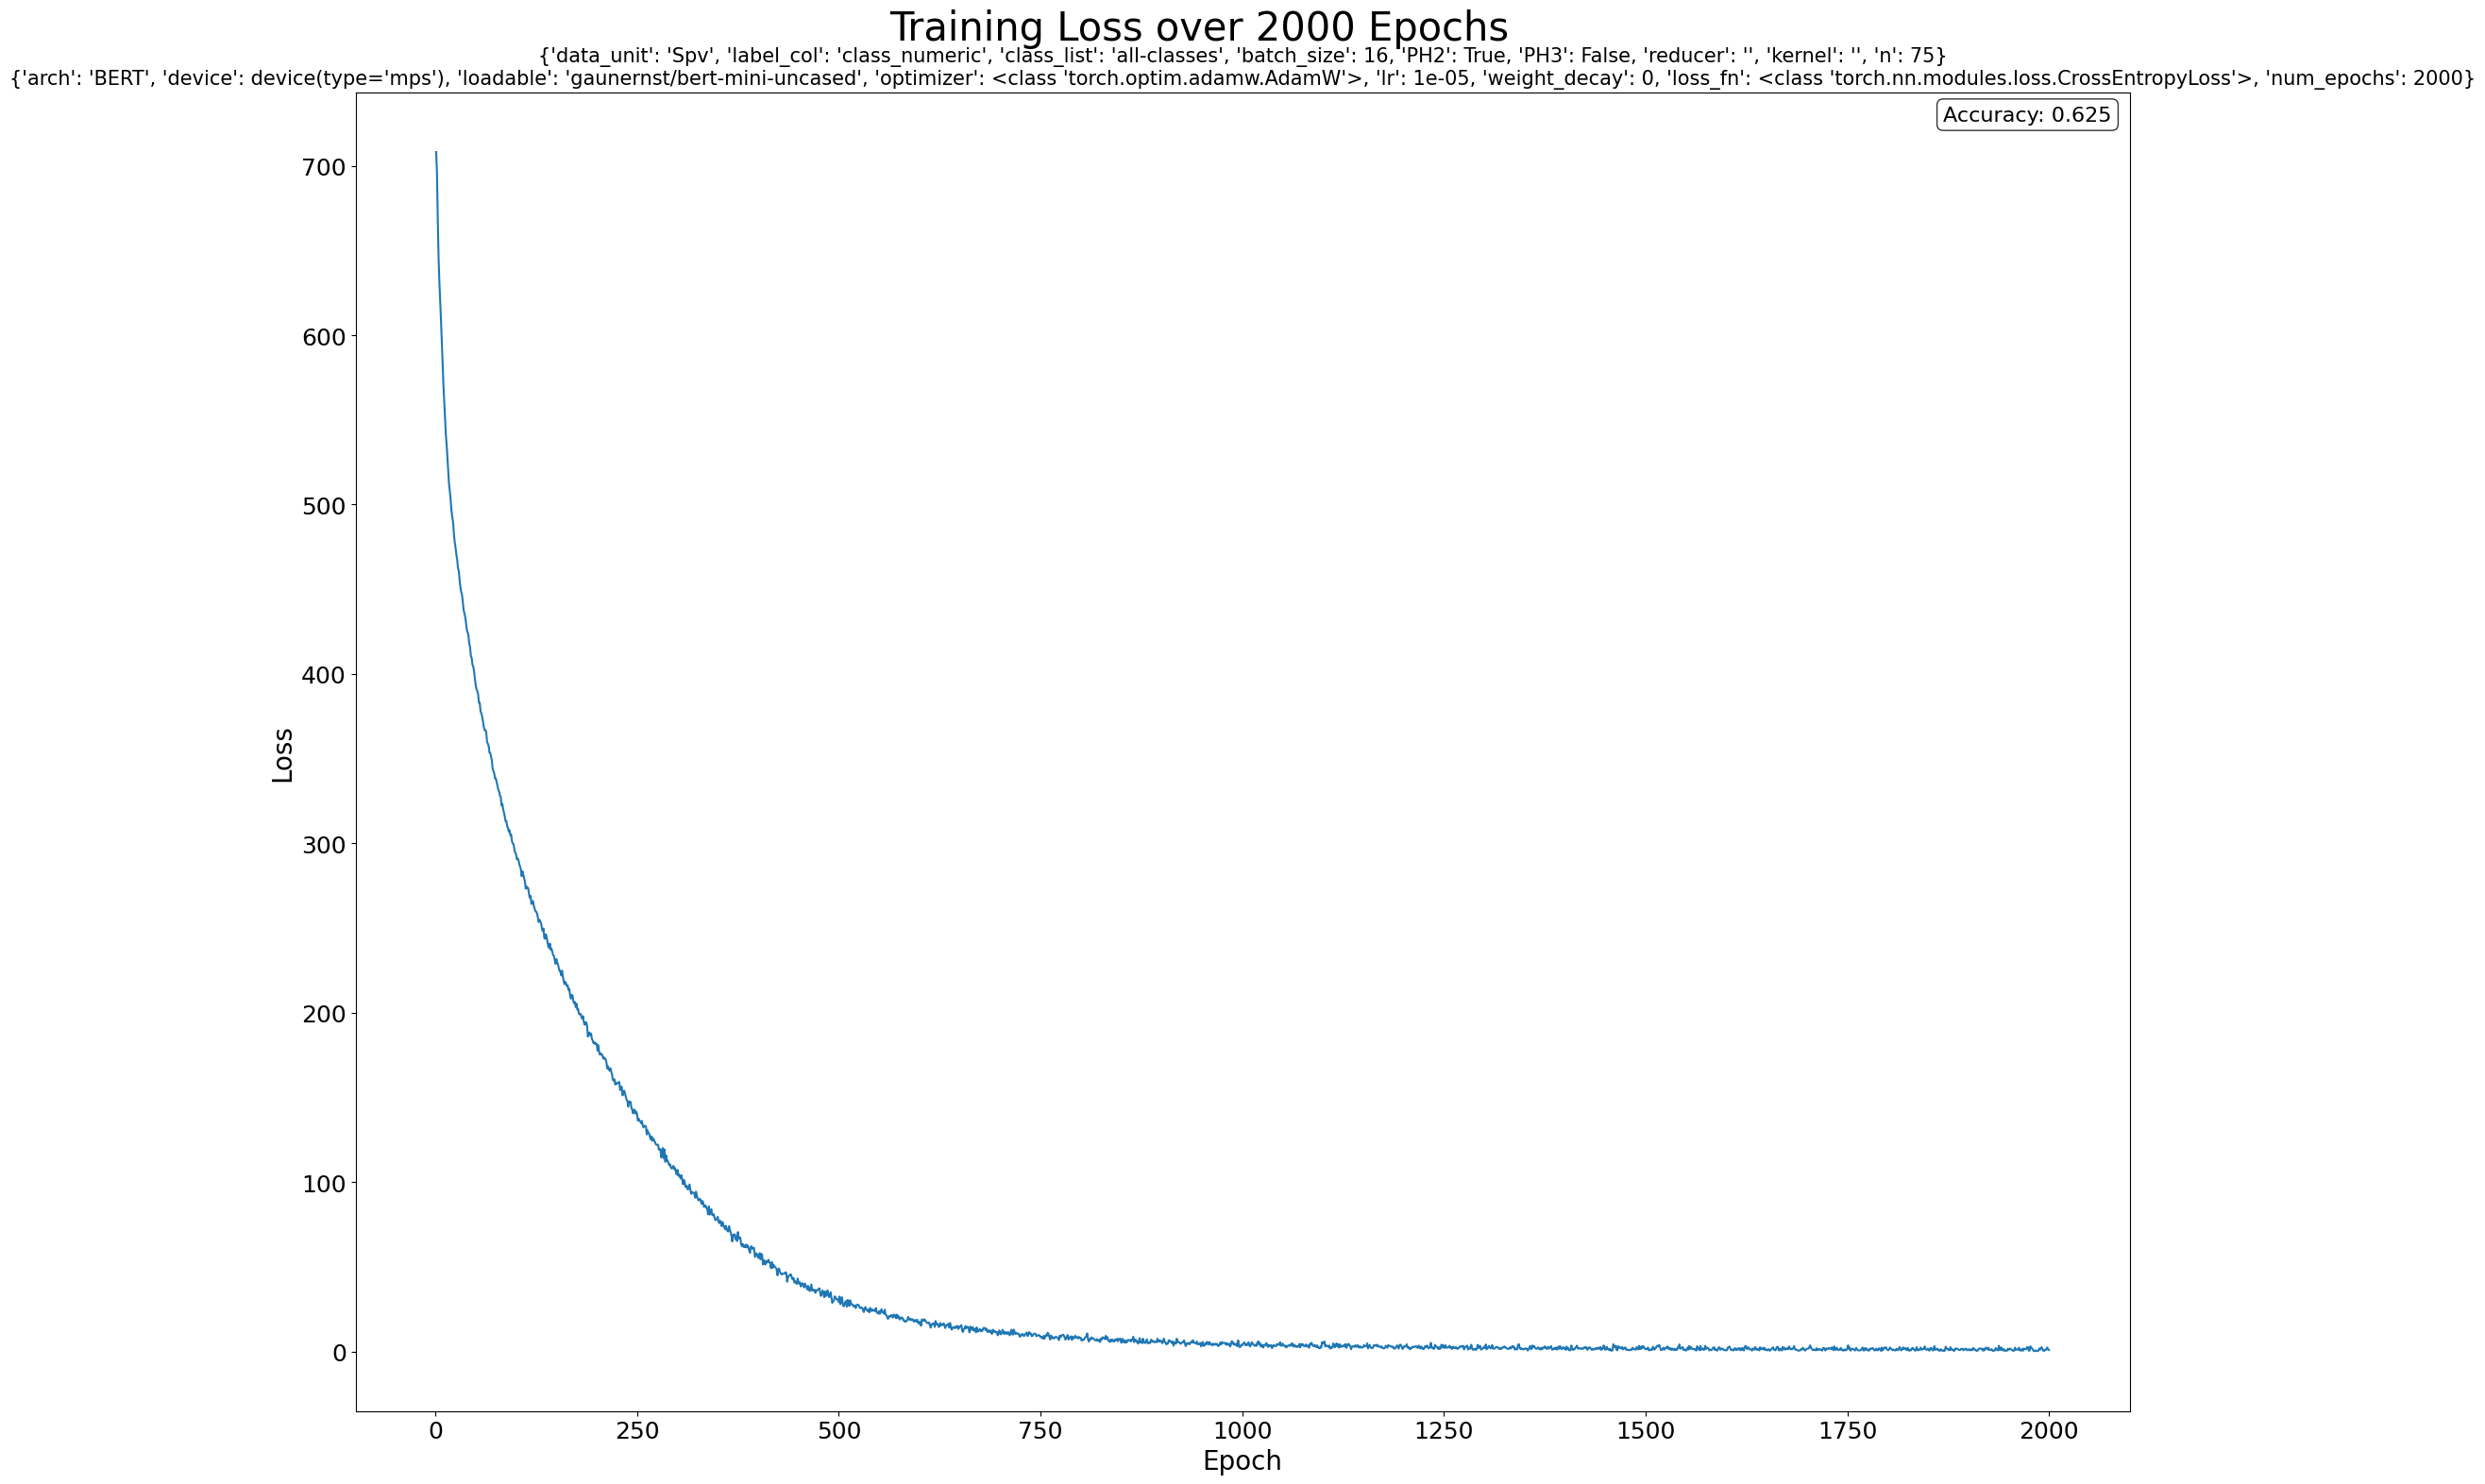

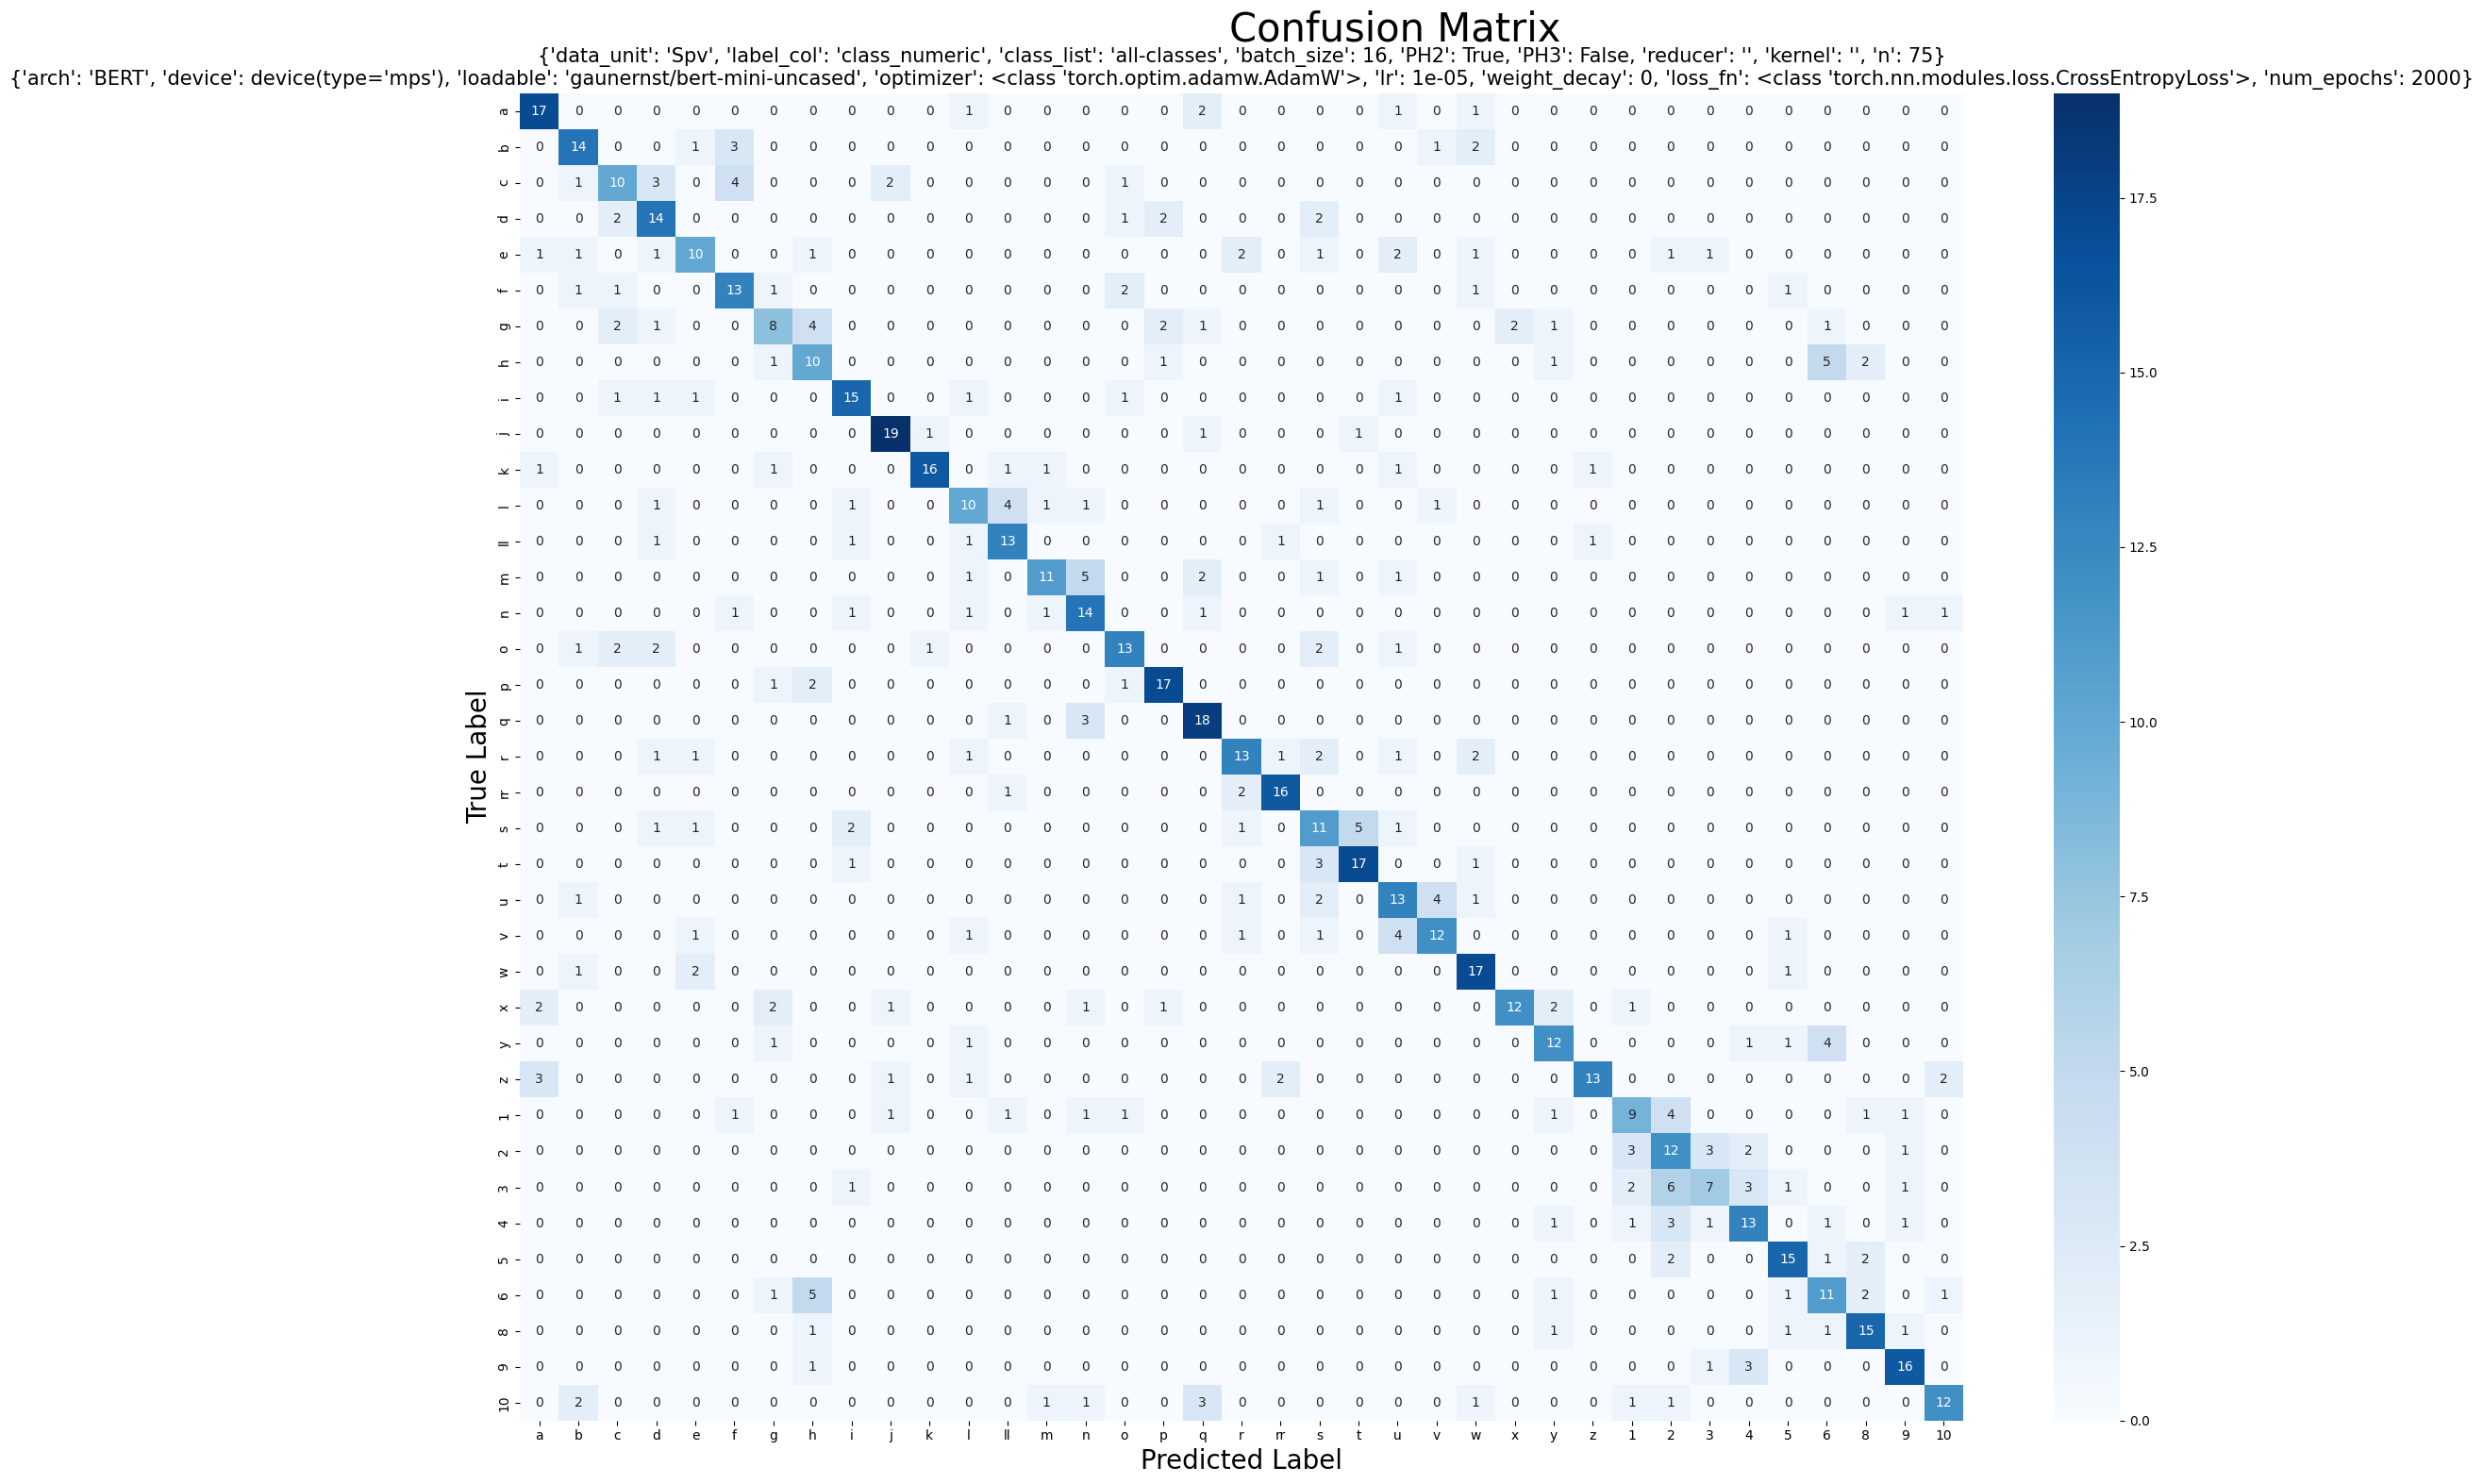

In [10]:
model.keep()
#bert.clean_bert()